** Overview **

This is a data story analysing the finishers of Boston marathon from the year 2017. 
Boston marathon is the oldest annual marathon. 

The dataset is made up of 26410 records and I am keen to analyse the data based on the following:**
* Participation by age and gender
* Participation by country
* Official time and pace stats

** Content **

The data has been downloaded from Kaggle.

It contains the name, age, gender, country, city and state (where available), times at 9 different stages of the race, expected time, finish time and pace, overall place, gender place and division place.

From the official website, we know that 97% of participants finished the marathon.
More statistics can be found at:
http://registration.baa.org/2017/cf/Public/iframe_Statistics.htm

** Acknowledgements **

Thanks to contributors on Kaggle who have given me some great ideas for the graphs

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# read the csv file 2017 results
df_2017 = pd.read_csv('marathon_results_2017.csv')
df_2016 = pd.read_csv('marathon_results_2016.csv')
df_2015 = pd.read_csv('marathon_results_2015.csv')

In [2]:
# get info about data: column names and number of rows
print(df_2017.shape)
print(df_2017.columns)
print(df_2017.info())

(26410, 25)
Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 25 columns):
Unnamed: 0       26410 non-null int64
Bib              26410 non-null object
Name             26410 non-null object
Age              26410 non-null int64
M/F              26410 non-null object
City             26410 non-null object
State            22815 non-null object
Country          26410 non-null object
Citizen          1254 non-null object
Unnamed: 9       91 non-null object
5K               26410 non-null object
10K              26410 non-null object
15K              26410 non-null object
20K              26410 non-null object
Half             26410 non-null object
25K              26

In [3]:
# some descriptive analysis
print(df_2017.describe())

         Unnamed: 0           Age       Overall        Gender      Division
count  26410.000000  26410.000000  26410.000000  26410.000000  26410.000000
mean   13204.500000     42.587732  13206.260091   6660.973230   1588.796706
std     7624.054641     11.419467   7624.370496   3910.031525   1423.199500
min        0.000000     18.000000      1.000000      1.000000      1.000000
25%     6602.250000     34.000000   6604.250000   3302.250000    502.000000
50%    13204.500000     43.000000  13206.500000   6603.500000   1154.000000
75%    19806.750000     51.000000  19808.750000   9904.750000   2190.750000
max    26409.000000     84.000000  26411.000000  14438.000000   5846.000000


In [4]:
# ovewview of data fields
print(df_2017.head(10))

   Unnamed: 0 Bib                Name  Age M/F              City State  \
0           0  11     Kirui, Geoffrey   24   M          Keringet   NaN   
1           1  17         Rupp, Galen   30   M          Portland    OR   
2           2  23       Osako, Suguru   25   M      Machida-City   NaN   
3           3  21    Biwott, Shadrack   32   M     Mammoth Lakes    CA   
4           4   9      Chebet, Wilson   31   M          Marakwet   NaN   
5           5  15    Abdirahman, Abdi   40   M           Phoenix    AZ   
6           6  63  Maiyo, Augustus K.   33   M  Colorado Springs    CO   
7           7   7         Sefir, Dino   28   M       Addis Ababa   NaN   
8           8  18      Puskedra, Luke   27   M            Eugene    OR   
9           9  20         Ward, Jared   28   M         Kaysville    UT   

  Country Citizen Unnamed: 9   ...         25K      30K      35K      40K  \
0     KEN     NaN        NaN   ...     1:16:59  1:33:01  1:48:19  2:02:53   
1     USA     NaN        NaN   

# Participation by age and gender

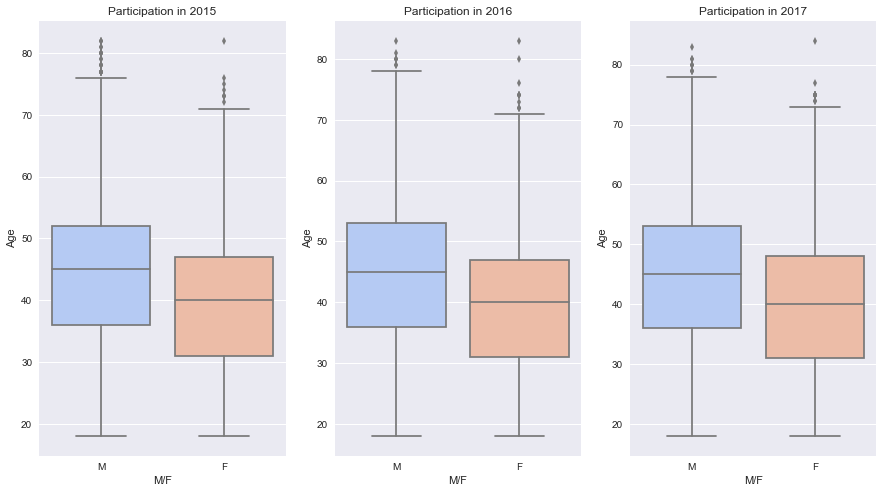

In [5]:
# plot all participants by age and gender
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.boxplot(df_2015['M/F'], df_2015['Age'], palette="coolwarm")
g.set_title("Participation in 2015")

ax2 = fig.add_subplot(1,3,2)
g = sns.boxplot(df_2016['M/F'], df_2016['Age'], palette="coolwarm")
g.set_title("Participation in 2016")

ax3 = fig.add_subplot(1,3,3)
g = sns.boxplot(df_2017['M/F'], df_2017['Age'], palette="coolwarm")
g.set_title("Participation in 2017")

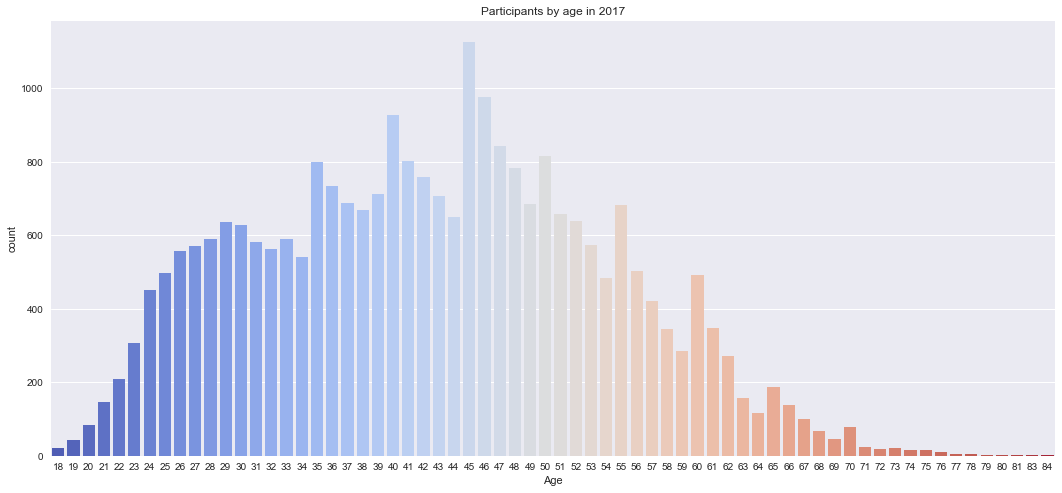

In [6]:
# plot all participants by age in 2017
g = sns.countplot('Age', data=df_2017, palette="coolwarm")
g.figure.set_size_inches(18,8)
g.set_title("Participants by age in 2017")

Numbers split by gender
M    14438
F    11972
Name: M/F, dtype: int64


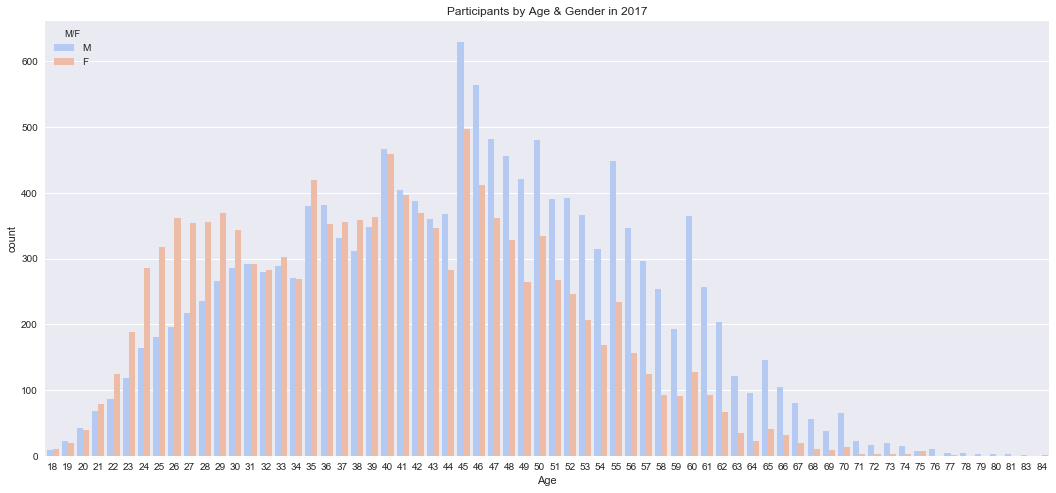

In [7]:
print('Numbers split by gender')
print(df_2017['M/F'].value_counts())

# split participants by age and gender
g = sns.countplot('Age', data=df_2017, palette="coolwarm", hue='M/F')
g.figure.set_size_inches(18,8)
g.set_title("Participants by Age & Gender in 2017")

# Participation by Country

In [8]:
# get the top 20 participating countries 
df_2017['Country'].value_counts()[:5]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
Name: Country, dtype: int64

** USA is by far the country with most participants followed(great margin) by Canada **

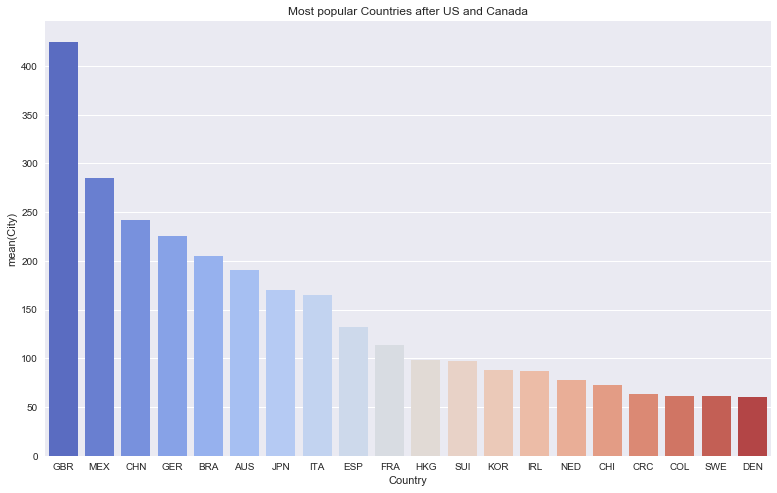

In [9]:
# participating countries after US and Canada
s = df_2017.groupby('Country').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='coolwarm')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Countries after US and Canada")

# Statistical and visual representation of finishing time

In [10]:
# convert the official time to seconds 
def convert_to_seconds(time):
    seconds = time.str.split(':').map(lambda x: int(x[-1]) + int(x[-2]) * 60 + int(x[-3]) * 3600)
    return seconds
df_2017.time_seconds = convert_to_seconds(df_2017['Official Time'])
df_2016.time_seconds = convert_to_seconds(df_2016['Official Time'])
df_2015.time_seconds = convert_to_seconds(df_2015['Official Time'])

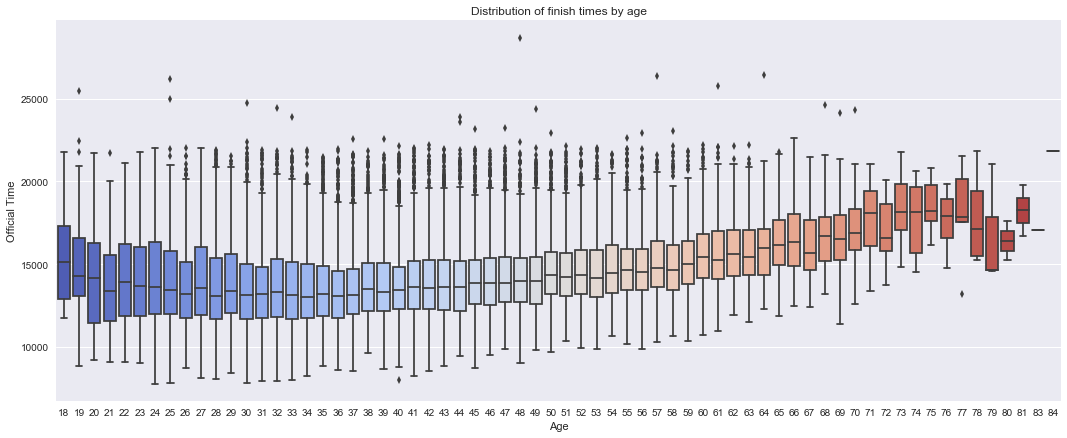

In [11]:
# boxplot description of finish times by age 
g = sns.boxplot(df_2017['Age'], df_2017.time_seconds, palette="coolwarm")
g.figure.set_size_inches(18,7)
g.set_title("Distribution of finish times by age")

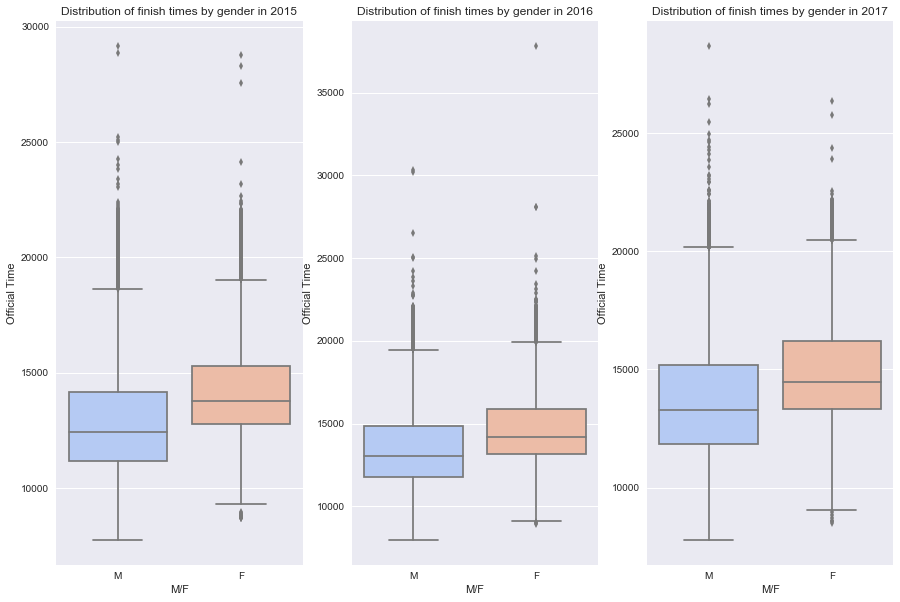

In [12]:
# plot the boxplots for 2015, 2016 and 2017 for comparison

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(1,3,1)
g = sns.boxplot(df_2015['M/F'], df_2015.time_seconds, palette="coolwarm")
ax1.set_title("Distribution of finish times by gender in 2015")

ax2 = fig.add_subplot(1,3,2)
g = sns.boxplot(df_2016['M/F'], df_2016.time_seconds, palette="coolwarm")
ax2.set_title("Distribution of finish times by gender in 2016")

ax3 = fig.add_subplot(1,3,3)
g = sns.boxplot(df_2017['M/F'], df_2017.time_seconds, palette="coolwarm")
ax3.set_title("Distribution of finish times by gender in 2017")

In [13]:
# top 20: winners official times
df_2015.time_seconds.sort_values()[:20]

0     7757
1     7788
2     7822
3     7847
4     7849
5     7852
6     7880
7     7962
8     8015
9     8032
10    8032
11    8057
12    8185
13    8282
14    8324
15    8352
16    8357
17    8404
18    8425
19    8435
Name: Official Time, dtype: int64

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


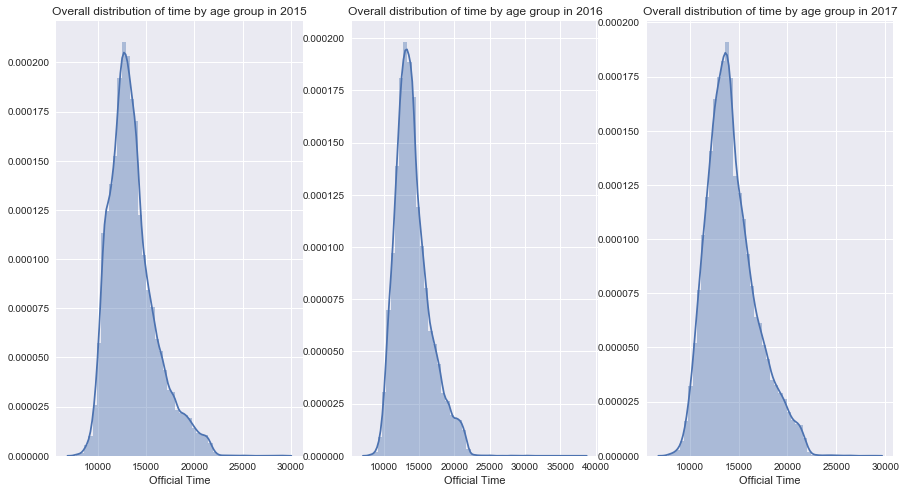

In [14]:
# plot all participants by age and gender
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,3,1)
g = sns.distplot(df_2015.time_seconds)
g.set_title("Overall distribution of time by age group in 2015")

ax2 = fig.add_subplot(1,3,2)
g = sns.distplot(df_2016.time_seconds)
g.set_title("Overall distribution of time by age group in 2016")

ax2 = fig.add_subplot(1,3,3)
g = sns.distplot(df_2017.time_seconds)
g.set_title("Overall distribution of time by age group in 2017")